# Extracción de Datos de CO2 y Temperatura

In [1]:
# Importamos las bibliotecas que vamos a usar
#%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import trapezoid
import os

In [2]:
# Definimos los arrays principales que vamos a usar
tiempos = np.array([])
co2 = np.array([])    # (ppm)

estado_valvula_co2_1 =  np.array([])
estado_valvula_compost_1 = np.array([])
estado_valvula_co2_2 =  np.array([])
estado_valvula_compost_2 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_3 =  np.array([])
estado_valvula_compost_3 = np.array([])
temp_suncho = np.array([])
estado_valvula_co2_4 =  np.array([])
estado_valvula_compost_4 = np.array([])
temp_suncho = np.array([])

temp_suncho = np.array([])

temp_compost_1 = np.array([])
temp_compost_2 = np.array([])
temp_compost_3 = np.array([])
temp_compost_4 = np.array([])

estado_suncho = np.array([])    # Apagado: 0, Prendido: 1

In [3]:
# Definamos la carpeta con las mediciones como PATH
PATH = f"./measurements/full-x4"

DATE= f'2022-05-01_23-06-08'

# Creamos una carpeta para las figuras (si es que no existe)
if not os.path.isdir(f"{PATH}/{DATE}/figuras"):
    os.makedirs(f"{PATH}/{DATE}/figuras")

In [4]:
# Veamos el primer archivo csv como ejemplo
df0 = pd.read_csv(f"{PATH}/{DATE}/data_0.csv")
display(df0)

,Date_Time,CO2,Estado_Valvula_CO2_1,Estado_Valvula_Compost_1,Estado_Valvula_CO2_2,Estado_Valvula_Compost_2,Estado_Valvula_CO2_3,Estado_Valvula_Compost_3,Estado_Valvula_CO2_4,Estado_Valvula_Compost_4,Temp_Compost_1,Temp_Compost_2,Temp_Compost_3,Temp_Compost_4,Temp_Suncho,Estado_Suncho
0,01/05/2022_23:06:10,710,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,49.81,53.06,56.94,54.75,48.88,Prendido
1,01/05/2022_23:06:16,691,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,49.81,52.88,56.94,54.81,48.81,Prendido
2,01/05/2022_23:06:22,687,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,49.81,52.75,56.88,54.75,48.88,Prendido
3,01/05/2022_23:06:28,686,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,49.81,52.63,56.88,54.81,48.94,Prendido
4,01/05/2022_23:06:34,684,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,49.81,52.50,56.88,54.75,48.94,Prendido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,01/05/2022_23:15:28,672,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,49.94,51.19,56.13,54.75,48.50,Prendido
96,01/05/2022_23:15:34,673,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,49.88,51.19,56.13,54.75,48.44,Prendido
97,01/05/2022_23:15:40,673,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,49.88,51.25,56.13,54.75,48.44,Prendido
98,01/05/2022_23:15:45,672,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,Apagado,Prendido,49.88,51.19,56.13,54.88,48.44,Prendido


In [5]:
# Antes de llenar los arrays vamos a necesitar una función que convierta un tiempo en el formato que usamos en tiempo absoluto para poder comparar las mediciones entre sí
def convertirTiempo(t_i, t):
    print(t)
    dia = int(t[:2])
    mes = int(t[3:5])
    ano = int(t[6:10])
    hora = int(t[11:13])
    minuto = int(t[14:16])
    segundo = int(t[17:])
    
    t_abs = segundo + 60 * minuto + (60 ** 2) * hora + 24 * (60 ** 2) * dia + 30 * 24 * (60 ** 2) * mes + 12 * 30 * 24 * (60 ** 2) * ano
    return t_abs - t_i


# Definamos el tiempo inicial
datetime0 = np.transpose(df0["Date_Time"].to_numpy())[0]
t_i = convertirTiempo(0, datetime0)

01/05/2022_23:06:10


In [6]:
# Contemos la cantidad de csv's  que llenamos
n = 0
for file in os.listdir(f'{PATH}/{DATE}'):
    if file.endswith(".csv"):
        n += 1

print(n)

182


In [7]:
# Llenemos las listas con los datos
for i in range(n):
    i=i
    df = pd.read_csv(f"{PATH}/{DATE}/data_{i}.csv")

    # CO2
    
    # Con este loop cambiamos cualquier tipo de error en la medicion de co2 a -1
    co2_column = df["CO2"].to_numpy()
    for i in range(len(co2_column)):
        # Chequeamos que la celda sea un str y que sea mas larga que 4, ya que el sensor solo mide hasta 5000
        if type(co2_column[i]) is str and len(co2_column[i]) > 4:
            co2_column[i] = -1

    co2 = np.concatenate((co2, np.transpose(co2_column)))

    # Tiempo
    for t in np.transpose(df["Date_Time"].to_numpy()):
        tiempos = np.concatenate((tiempos, np.array([convertirTiempo(t_i, t)])))
        
    # Temperaturas
    temp_suncho = np.concatenate((temp_suncho, np.transpose(df["Temp_Suncho"].to_numpy())))
    temp_compost_1 = np.concatenate((temp_compost_1, np.transpose(df["Temp_Compost_1"].to_numpy())))
    temp_compost_2 = np.concatenate((temp_compost_2, np.transpose(df["Temp_Compost_2"].to_numpy())))
    temp_compost_3 = np.concatenate((temp_compost_3, np.transpose(df["Temp_Compost_3"].to_numpy())))
    temp_compost_4 = np.concatenate((temp_compost_4, np.transpose(df["Temp_Compost_4"].to_numpy())))
    
    # Estados
    for e in np.transpose(df["Estado_Valvula_CO2_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([1])))
        else:
            estado_valvula_co2_1 = np.concatenate((estado_valvula_co2_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_1"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([1])))
        else:
            estado_valvula_compost_1 = np.concatenate((estado_valvula_compost_1, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_CO2_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([1])))
        else:
            estado_valvula_co2_2 = np.concatenate((estado_valvula_co2_2, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_2"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([1])))
        else:
            estado_valvula_compost_2 = np.concatenate((estado_valvula_compost_2, np.array([0])))

    for e in np.transpose(df["Estado_Valvula_CO2_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([1])))
        else:
            estado_valvula_co2_3 = np.concatenate((estado_valvula_co2_3, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_3"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([1])))
        else:
            estado_valvula_compost_3 = np.concatenate((estado_valvula_compost_3, np.array([0])))
       
    for e in np.transpose(df["Estado_Valvula_CO2_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([1])))
        else:
            estado_valvula_co2_4 = np.concatenate((estado_valvula_co2_4, np.array([0])))
    
    for e in np.transpose(df["Estado_Valvula_Compost_4"].to_numpy()):
        if e == "Prendido":
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([1])))
        else:
            estado_valvula_compost_4 = np.concatenate((estado_valvula_compost_4, np.array([0])))   
    
    
    for e in np.transpose(df["Estado_Suncho"].to_numpy()):
        if e == "Prendido":
            estado_suncho = np.concatenate((estado_suncho, np.array([1])))
        else:
            estado_suncho = np.concatenate((estado_suncho, np.array([0])))

01/05/2022_23:06:10
01/05/2022_23:06:16
01/05/2022_23:06:22
01/05/2022_23:06:28
01/05/2022_23:06:34
01/05/2022_23:06:40
01/05/2022_23:06:46
01/05/2022_23:06:52
01/05/2022_23:06:57
01/05/2022_23:07:03
01/05/2022_23:07:09
01/05/2022_23:07:15
01/05/2022_23:07:21
01/05/2022_23:07:27
01/05/2022_23:07:33
01/05/2022_23:07:38
01/05/2022_23:07:44
01/05/2022_23:07:50
01/05/2022_23:07:56
01/05/2022_23:08:02
01/05/2022_23:08:08
01/05/2022_23:08:14
01/05/2022_23:08:20
01/05/2022_23:08:25
01/05/2022_23:08:31
01/05/2022_23:08:37
01/05/2022_23:08:43
01/05/2022_23:08:49
01/05/2022_23:08:55
01/05/2022_23:09:01
01/05/2022_23:09:06
01/05/2022_23:09:12
01/05/2022_23:09:18
01/05/2022_23:09:24
01/05/2022_23:09:30
01/05/2022_23:09:36
01/05/2022_23:09:42
01/05/2022_23:09:48
01/05/2022_23:09:53
01/05/2022_23:09:59
01/05/2022_23:10:05
01/05/2022_23:10:11
01/05/2022_23:10:17
01/05/2022_23:10:23
01/05/2022_23:10:29
01/05/2022_23:10:34
01/05/2022_23:10:40
01/05/2022_23:10:46
01/05/2022_23:10:52
01/05/2022_23:10:58


01/05/2022_23:49:12
01/05/2022_23:49:18
01/05/2022_23:49:24
01/05/2022_23:49:29
01/05/2022_23:49:35
01/05/2022_23:49:41
01/05/2022_23:49:47
01/05/2022_23:49:53
01/05/2022_23:49:59
01/05/2022_23:50:05
01/05/2022_23:50:11
01/05/2022_23:50:16
01/05/2022_23:50:22
01/05/2022_23:50:28
01/05/2022_23:50:34
01/05/2022_23:50:40
01/05/2022_23:50:46
01/05/2022_23:50:52
01/05/2022_23:50:57
01/05/2022_23:51:03
01/05/2022_23:51:09
01/05/2022_23:51:15
01/05/2022_23:51:21
01/05/2022_23:51:27
01/05/2022_23:51:33
01/05/2022_23:51:39
01/05/2022_23:51:44
01/05/2022_23:51:50
01/05/2022_23:51:56
01/05/2022_23:52:02
01/05/2022_23:52:08
01/05/2022_23:52:14
01/05/2022_23:52:20
01/05/2022_23:52:25
01/05/2022_23:52:31
01/05/2022_23:52:37
01/05/2022_23:52:43
01/05/2022_23:52:49
01/05/2022_23:52:55
01/05/2022_23:53:01
01/05/2022_23:53:07
01/05/2022_23:53:12
01/05/2022_23:53:18
01/05/2022_23:53:24
01/05/2022_23:53:30
01/05/2022_23:53:36
01/05/2022_23:53:42
01/05/2022_23:53:48
01/05/2022_23:53:53
01/05/2022_23:53:59


02/05/2022_00:34:11
02/05/2022_00:34:17
02/05/2022_00:34:22
02/05/2022_00:34:28
02/05/2022_00:34:34
02/05/2022_00:34:40
02/05/2022_00:34:46
02/05/2022_00:34:52
02/05/2022_00:34:58
02/05/2022_00:35:04
02/05/2022_00:35:09
02/05/2022_00:35:15
02/05/2022_00:35:21
02/05/2022_00:35:27
02/05/2022_00:35:33
02/05/2022_00:35:39
02/05/2022_00:35:45
02/05/2022_00:35:50
02/05/2022_00:35:56
02/05/2022_00:36:02
02/05/2022_00:36:08
02/05/2022_00:36:14
02/05/2022_00:36:20
02/05/2022_00:36:26
02/05/2022_00:36:32
02/05/2022_00:36:37
02/05/2022_00:36:43
02/05/2022_00:36:49
02/05/2022_00:36:55
02/05/2022_00:37:01
02/05/2022_00:37:07
02/05/2022_00:37:13
02/05/2022_00:37:18
02/05/2022_00:37:24
02/05/2022_00:37:30
02/05/2022_00:37:36
02/05/2022_00:37:42
02/05/2022_00:37:48
02/05/2022_00:37:54
02/05/2022_00:38:00
02/05/2022_00:38:05
02/05/2022_00:38:11
02/05/2022_00:38:17
02/05/2022_00:38:23
02/05/2022_00:38:29
02/05/2022_00:38:35
02/05/2022_00:38:41
02/05/2022_00:38:46
02/05/2022_00:38:52
02/05/2022_00:38:58


02/05/2022_01:15:50
02/05/2022_01:15:56
02/05/2022_01:16:02
02/05/2022_01:16:08
02/05/2022_01:16:14
02/05/2022_01:16:20
02/05/2022_01:16:26
02/05/2022_01:16:31
02/05/2022_01:16:37
02/05/2022_01:16:43
02/05/2022_01:16:49
02/05/2022_01:16:55
02/05/2022_01:17:01
02/05/2022_01:17:07
02/05/2022_01:17:13
02/05/2022_01:17:18
02/05/2022_01:17:24
02/05/2022_01:17:30
02/05/2022_01:17:36
02/05/2022_01:17:42
02/05/2022_01:17:48
02/05/2022_01:17:54
02/05/2022_01:18:00
02/05/2022_01:18:05
02/05/2022_01:18:11
02/05/2022_01:18:17
02/05/2022_01:18:23
02/05/2022_01:18:29
02/05/2022_01:18:35
02/05/2022_01:18:41
02/05/2022_01:18:46
02/05/2022_01:18:52
02/05/2022_01:18:58
02/05/2022_01:19:04
02/05/2022_01:19:10
02/05/2022_01:19:16
02/05/2022_01:19:22
02/05/2022_01:19:28
02/05/2022_01:19:33
02/05/2022_01:19:39
02/05/2022_01:19:45
02/05/2022_01:19:51
02/05/2022_01:19:57
02/05/2022_01:20:03
02/05/2022_01:20:09
02/05/2022_01:20:14
02/05/2022_01:20:20
02/05/2022_01:20:26
02/05/2022_01:20:32
02/05/2022_01:20:38


02/05/2022_02:02:53
02/05/2022_02:02:58
02/05/2022_02:03:04
02/05/2022_02:03:10
02/05/2022_02:03:16
02/05/2022_02:03:22
02/05/2022_02:03:28
02/05/2022_02:03:34
02/05/2022_02:03:40
02/05/2022_02:03:45
02/05/2022_02:03:51
02/05/2022_02:03:57
02/05/2022_02:04:03
02/05/2022_02:04:09
02/05/2022_02:04:15
02/05/2022_02:04:21
02/05/2022_02:04:26
02/05/2022_02:04:32
02/05/2022_02:04:38
02/05/2022_02:04:44
02/05/2022_02:04:50
02/05/2022_02:04:56
02/05/2022_02:05:02
02/05/2022_02:05:08
02/05/2022_02:05:13
02/05/2022_02:05:19
02/05/2022_02:05:25
02/05/2022_02:05:31
02/05/2022_02:05:37
02/05/2022_02:05:43
02/05/2022_02:05:49
02/05/2022_02:05:55
02/05/2022_02:06:00
02/05/2022_02:06:06
02/05/2022_02:06:12
02/05/2022_02:06:18
02/05/2022_02:06:24
02/05/2022_02:06:30
02/05/2022_02:06:36
02/05/2022_02:06:41
02/05/2022_02:06:47
02/05/2022_02:06:53
02/05/2022_02:06:59
02/05/2022_02:07:05
02/05/2022_02:07:11
02/05/2022_02:07:17
02/05/2022_02:07:23
02/05/2022_02:07:28
02/05/2022_02:07:34
02/05/2022_02:07:40


02/05/2022_02:51:05
02/05/2022_02:51:11
02/05/2022_02:51:17
02/05/2022_02:51:23
02/05/2022_02:51:28
02/05/2022_02:51:34
02/05/2022_02:51:40
02/05/2022_02:51:46
02/05/2022_02:51:52
02/05/2022_02:51:58
02/05/2022_02:52:04
02/05/2022_02:52:09
02/05/2022_02:52:15
02/05/2022_02:52:21
02/05/2022_02:52:27
02/05/2022_02:52:33
02/05/2022_02:52:39
02/05/2022_02:52:45
02/05/2022_02:52:51
02/05/2022_02:52:56
02/05/2022_02:53:02
02/05/2022_02:53:08
02/05/2022_02:53:14
02/05/2022_02:53:20
02/05/2022_02:53:26
02/05/2022_02:53:32
02/05/2022_02:53:37
02/05/2022_02:53:43
02/05/2022_02:53:49
02/05/2022_02:53:55
02/05/2022_02:54:01
02/05/2022_02:54:07
02/05/2022_02:54:13
02/05/2022_02:54:19
02/05/2022_02:54:24
02/05/2022_02:54:30
02/05/2022_02:54:36
02/05/2022_02:54:42
02/05/2022_02:54:48
02/05/2022_02:54:54
02/05/2022_02:55:00
02/05/2022_02:55:05
02/05/2022_02:55:11
02/05/2022_02:55:17
02/05/2022_02:55:23
02/05/2022_02:55:29
02/05/2022_02:55:35
02/05/2022_02:55:41
02/05/2022_02:55:47
02/05/2022_02:55:52


02/05/2022_03:33:25
02/05/2022_03:33:31
02/05/2022_03:33:37
02/05/2022_03:33:43
02/05/2022_03:33:49
02/05/2022_03:33:55
02/05/2022_03:34:01
02/05/2022_03:34:06
02/05/2022_03:34:12
02/05/2022_03:34:18
02/05/2022_03:34:24
02/05/2022_03:34:30
02/05/2022_03:34:36
02/05/2022_03:34:42
02/05/2022_03:34:47
02/05/2022_03:34:53
02/05/2022_03:34:59
02/05/2022_03:35:05
02/05/2022_03:35:11
02/05/2022_03:35:17
02/05/2022_03:35:23
02/05/2022_03:35:29
02/05/2022_03:35:34
02/05/2022_03:35:40
02/05/2022_03:35:46
02/05/2022_03:35:52
02/05/2022_03:35:58
02/05/2022_03:36:04
02/05/2022_03:36:10
02/05/2022_03:36:15
02/05/2022_03:36:21
02/05/2022_03:36:27
02/05/2022_03:36:33
02/05/2022_03:36:38
02/05/2022_03:36:44
02/05/2022_03:36:50
02/05/2022_03:36:56
02/05/2022_03:37:02
02/05/2022_03:37:08
02/05/2022_03:37:14
02/05/2022_03:37:20
02/05/2022_03:37:25
02/05/2022_03:37:31
02/05/2022_03:37:37
02/05/2022_03:37:43
02/05/2022_03:37:49
02/05/2022_03:37:55
02/05/2022_03:38:01
02/05/2022_03:38:06
02/05/2022_03:38:12


02/05/2022_04:19:05
02/05/2022_04:19:11
02/05/2022_04:19:16
02/05/2022_04:19:22
02/05/2022_04:19:28
02/05/2022_04:19:34
02/05/2022_04:19:40
02/05/2022_04:19:46
02/05/2022_04:19:52
02/05/2022_04:19:57
02/05/2022_04:20:03
02/05/2022_04:20:09
02/05/2022_04:20:15
02/05/2022_04:20:21
02/05/2022_04:20:27
02/05/2022_04:20:33
02/05/2022_04:20:39
02/05/2022_04:20:44
02/05/2022_04:20:50
02/05/2022_04:20:56
02/05/2022_04:21:02
02/05/2022_04:21:08
02/05/2022_04:21:14
02/05/2022_04:21:20
02/05/2022_04:21:26
02/05/2022_04:21:31
02/05/2022_04:21:37
02/05/2022_04:21:43
02/05/2022_04:21:49
02/05/2022_04:21:55
02/05/2022_04:22:01
02/05/2022_04:22:07
02/05/2022_04:22:12
02/05/2022_04:22:18
02/05/2022_04:22:24
02/05/2022_04:22:30
02/05/2022_04:22:36
02/05/2022_04:22:42
02/05/2022_04:22:48
02/05/2022_04:22:54
02/05/2022_04:22:59
02/05/2022_04:23:05
02/05/2022_04:23:11
02/05/2022_04:23:17
02/05/2022_04:23:23
02/05/2022_04:23:29
02/05/2022_04:23:35
02/05/2022_04:23:40
02/05/2022_04:23:46
02/05/2022_04:23:52


02/05/2022_04:59:45
02/05/2022_04:59:51
02/05/2022_04:59:57
02/05/2022_05:00:03
02/05/2022_05:00:09
02/05/2022_05:00:14
02/05/2022_05:00:20
02/05/2022_05:00:26
02/05/2022_05:00:32
02/05/2022_05:00:38
02/05/2022_05:00:44
02/05/2022_05:00:50
02/05/2022_05:00:55
02/05/2022_05:01:01
02/05/2022_05:01:07
02/05/2022_05:01:13
02/05/2022_05:01:19
02/05/2022_05:01:25
02/05/2022_05:01:31
02/05/2022_05:01:37
02/05/2022_05:01:42
02/05/2022_05:01:48
02/05/2022_05:01:54
02/05/2022_05:02:00
02/05/2022_05:02:06
02/05/2022_05:02:12
02/05/2022_05:02:18
02/05/2022_05:02:23
02/05/2022_05:02:29
02/05/2022_05:02:35
02/05/2022_05:02:41
02/05/2022_05:02:47
02/05/2022_05:02:53
02/05/2022_05:02:59
02/05/2022_05:03:05
02/05/2022_05:03:10
02/05/2022_05:03:16
02/05/2022_05:03:22
02/05/2022_05:03:28
02/05/2022_05:03:34
02/05/2022_05:03:40
02/05/2022_05:03:46
02/05/2022_05:03:51
02/05/2022_05:03:57
02/05/2022_05:04:03
02/05/2022_05:04:09
02/05/2022_05:04:15
02/05/2022_05:04:21
02/05/2022_05:04:27
02/05/2022_05:04:33


02/05/2022_05:40:08
02/05/2022_05:40:13
02/05/2022_05:40:19
02/05/2022_05:40:25
02/05/2022_05:40:31
02/05/2022_05:40:37
02/05/2022_05:40:43
02/05/2022_05:40:49
02/05/2022_05:40:54
02/05/2022_05:41:00
02/05/2022_05:41:06
02/05/2022_05:41:12
02/05/2022_05:41:18
02/05/2022_05:41:24
02/05/2022_05:41:30
02/05/2022_05:41:36
02/05/2022_05:41:41
02/05/2022_05:41:47
02/05/2022_05:41:53
02/05/2022_05:41:59
02/05/2022_05:42:05
02/05/2022_05:42:11
02/05/2022_05:42:17
02/05/2022_05:42:22
02/05/2022_05:42:28
02/05/2022_05:42:34
02/05/2022_05:42:40
02/05/2022_05:42:46
02/05/2022_05:42:52
02/05/2022_05:42:58
02/05/2022_05:43:04
02/05/2022_05:43:09
02/05/2022_05:43:15
02/05/2022_05:43:21
02/05/2022_05:43:27
02/05/2022_05:43:33
02/05/2022_05:43:39
02/05/2022_05:43:45
02/05/2022_05:43:50
02/05/2022_05:43:56
02/05/2022_05:44:02
02/05/2022_05:44:08
02/05/2022_05:44:14
02/05/2022_05:44:20
02/05/2022_05:44:26
02/05/2022_05:44:32
02/05/2022_05:44:37
02/05/2022_05:44:43
02/05/2022_05:44:49
02/05/2022_05:44:55


02/05/2022_06:22:10
02/05/2022_06:22:16
02/05/2022_06:22:22
02/05/2022_06:22:28
02/05/2022_06:22:34
02/05/2022_06:22:40
02/05/2022_06:22:45
02/05/2022_06:22:51
02/05/2022_06:22:57
02/05/2022_06:23:03
02/05/2022_06:23:09
02/05/2022_06:23:15
02/05/2022_06:23:21
02/05/2022_06:23:26
02/05/2022_06:23:32
02/05/2022_06:23:38
02/05/2022_06:23:44
02/05/2022_06:23:50
02/05/2022_06:23:56
02/05/2022_06:24:02
02/05/2022_06:24:08
02/05/2022_06:24:13
02/05/2022_06:24:19
02/05/2022_06:24:25
02/05/2022_06:24:31
02/05/2022_06:24:37
02/05/2022_06:24:43
02/05/2022_06:24:49
02/05/2022_06:24:54
02/05/2022_06:25:00
02/05/2022_06:25:06
02/05/2022_06:25:12
02/05/2022_06:25:18
02/05/2022_06:25:24
02/05/2022_06:25:30
02/05/2022_06:25:36
02/05/2022_06:25:41
02/05/2022_06:25:47
02/05/2022_06:25:53
02/05/2022_06:25:59
02/05/2022_06:26:05
02/05/2022_06:26:11
02/05/2022_06:26:17
02/05/2022_06:26:22
02/05/2022_06:26:28
02/05/2022_06:26:34
02/05/2022_06:26:40
02/05/2022_06:26:46
02/05/2022_06:26:52
02/05/2022_06:26:58


02/05/2022_07:16:26
02/05/2022_07:16:32
02/05/2022_07:16:38
02/05/2022_07:16:44
02/05/2022_07:16:50
02/05/2022_07:16:55
02/05/2022_07:17:01
02/05/2022_07:17:07
02/05/2022_07:17:13
02/05/2022_07:17:19
02/05/2022_07:17:25
02/05/2022_07:17:31
02/05/2022_07:17:37
02/05/2022_07:17:42
02/05/2022_07:17:48
02/05/2022_07:17:54
02/05/2022_07:18:00
02/05/2022_07:18:06
02/05/2022_07:18:12
02/05/2022_07:18:18
02/05/2022_07:18:23
02/05/2022_07:18:29
02/05/2022_07:18:35
02/05/2022_07:18:41
02/05/2022_07:18:47
02/05/2022_07:18:53
02/05/2022_07:18:59
02/05/2022_07:19:05
02/05/2022_07:19:10
02/05/2022_07:19:16
02/05/2022_07:19:22
02/05/2022_07:19:28
02/05/2022_07:19:34
02/05/2022_07:19:40
02/05/2022_07:19:46
02/05/2022_07:19:52
02/05/2022_07:19:57
02/05/2022_07:20:03
02/05/2022_07:20:09
02/05/2022_07:20:15
02/05/2022_07:20:21
02/05/2022_07:20:27
02/05/2022_07:20:33
02/05/2022_07:20:38
02/05/2022_07:20:44
02/05/2022_07:20:50
02/05/2022_07:20:56
02/05/2022_07:21:02
02/05/2022_07:21:08
02/05/2022_07:21:14


02/05/2022_08:20:11
02/05/2022_08:20:17
02/05/2022_08:20:23
02/05/2022_08:20:29
02/05/2022_08:20:35
02/05/2022_08:20:41
02/05/2022_08:20:46
02/05/2022_08:20:52
02/05/2022_08:20:58
02/05/2022_08:21:04
02/05/2022_08:21:10
02/05/2022_08:21:16
02/05/2022_08:21:22
02/05/2022_08:21:28
02/05/2022_08:21:33
02/05/2022_08:21:39
02/05/2022_08:21:45
02/05/2022_08:21:51
02/05/2022_08:21:57
02/05/2022_08:22:03
02/05/2022_08:22:09
02/05/2022_08:22:14
02/05/2022_08:22:20
02/05/2022_08:22:26
02/05/2022_08:22:32
02/05/2022_08:22:38
02/05/2022_08:22:44
02/05/2022_08:22:50
02/05/2022_08:22:56
02/05/2022_08:23:01
02/05/2022_08:23:07
02/05/2022_08:23:13
02/05/2022_08:23:19
02/05/2022_08:23:25
02/05/2022_08:23:31
02/05/2022_08:23:37
02/05/2022_08:23:42
02/05/2022_08:23:48
02/05/2022_08:23:54
02/05/2022_08:24:00
02/05/2022_08:24:06
02/05/2022_08:24:12
02/05/2022_08:24:18
02/05/2022_08:24:24
02/05/2022_08:24:29
02/05/2022_08:24:35
02/05/2022_08:24:41
02/05/2022_08:24:47
02/05/2022_08:24:53
02/05/2022_08:24:59


02/05/2022_09:03:54
02/05/2022_09:03:59
02/05/2022_09:04:05
02/05/2022_09:04:11
02/05/2022_09:04:17
02/05/2022_09:04:23
02/05/2022_09:04:29
02/05/2022_09:04:35
02/05/2022_09:04:40
02/05/2022_09:04:46
02/05/2022_09:04:52
02/05/2022_09:04:58
02/05/2022_09:05:04
02/05/2022_09:05:10
02/05/2022_09:05:16
02/05/2022_09:05:22
02/05/2022_09:05:27
02/05/2022_09:05:33
02/05/2022_09:05:39
02/05/2022_09:05:45
02/05/2022_09:05:51
02/05/2022_09:05:57
02/05/2022_09:06:03
02/05/2022_09:06:08
02/05/2022_09:06:14
02/05/2022_09:06:20
02/05/2022_09:06:26
02/05/2022_09:06:32
02/05/2022_09:06:38
02/05/2022_09:06:44
02/05/2022_09:06:50
02/05/2022_09:06:55
02/05/2022_09:07:01
02/05/2022_09:07:07
02/05/2022_09:07:13
02/05/2022_09:07:19
02/05/2022_09:07:25
02/05/2022_09:07:31
02/05/2022_09:07:36
02/05/2022_09:07:42
02/05/2022_09:07:48
02/05/2022_09:07:54
02/05/2022_09:08:00
02/05/2022_09:08:06
02/05/2022_09:08:12
02/05/2022_09:08:18
02/05/2022_09:08:23
02/05/2022_09:08:29
02/05/2022_09:08:35
02/05/2022_09:08:41


02/05/2022_09:46:31
02/05/2022_09:46:37
02/05/2022_09:46:43
02/05/2022_09:46:49
02/05/2022_09:46:55
02/05/2022_09:47:01
02/05/2022_09:47:06
02/05/2022_09:47:12
02/05/2022_09:47:18
02/05/2022_09:47:24
02/05/2022_09:47:30
02/05/2022_09:47:36
02/05/2022_09:47:42
02/05/2022_09:47:48
02/05/2022_09:47:53
02/05/2022_09:47:59
02/05/2022_09:48:05
02/05/2022_09:48:11
02/05/2022_09:48:17
02/05/2022_09:48:23
02/05/2022_09:48:29
02/05/2022_09:48:34
02/05/2022_09:48:40
02/05/2022_09:48:46
02/05/2022_09:48:52
02/05/2022_09:48:58
02/05/2022_09:49:04
02/05/2022_09:49:10
02/05/2022_09:49:16
02/05/2022_09:49:21
02/05/2022_09:49:27
02/05/2022_09:49:33
02/05/2022_09:49:39
02/05/2022_09:49:45
02/05/2022_09:49:51
02/05/2022_09:49:57
02/05/2022_09:50:02
02/05/2022_09:50:08
02/05/2022_09:50:14
02/05/2022_09:50:20
02/05/2022_09:50:26
02/05/2022_09:50:32
02/05/2022_09:50:38
02/05/2022_09:50:44
02/05/2022_09:50:49
02/05/2022_09:50:55
02/05/2022_09:51:01
02/05/2022_09:51:07
02/05/2022_09:51:13
02/05/2022_09:51:19


02/05/2022_10:30:37
02/05/2022_10:30:43
02/05/2022_10:30:49
02/05/2022_10:30:55
02/05/2022_10:31:01
02/05/2022_10:31:06
02/05/2022_10:31:12
02/05/2022_10:31:18
02/05/2022_10:31:24
02/05/2022_10:31:30
02/05/2022_10:31:36
02/05/2022_10:31:42
02/05/2022_10:31:47
02/05/2022_10:31:53
02/05/2022_10:31:59
02/05/2022_10:32:05
02/05/2022_10:32:11
02/05/2022_10:32:17
02/05/2022_10:32:23
02/05/2022_10:32:29
02/05/2022_10:32:34
02/05/2022_10:32:40
02/05/2022_10:32:46
02/05/2022_10:32:52
02/05/2022_10:32:58
02/05/2022_10:33:04
02/05/2022_10:33:10
02/05/2022_10:33:15
02/05/2022_10:33:21
02/05/2022_10:33:27
02/05/2022_10:33:33
02/05/2022_10:33:39
02/05/2022_10:33:45
02/05/2022_10:33:51
02/05/2022_10:33:57
02/05/2022_10:34:02
02/05/2022_10:34:08
02/05/2022_10:34:14
02/05/2022_10:34:20
02/05/2022_10:34:26
02/05/2022_10:34:32
02/05/2022_10:34:38
02/05/2022_10:34:43
02/05/2022_10:34:49
02/05/2022_10:34:55
02/05/2022_10:35:01
02/05/2022_10:35:07
02/05/2022_10:35:13
02/05/2022_10:35:19
02/05/2022_10:35:25


02/05/2022_11:29:17
02/05/2022_11:29:23
02/05/2022_11:29:29
02/05/2022_11:29:34
02/05/2022_11:29:40
02/05/2022_11:29:46
02/05/2022_11:29:52
02/05/2022_11:29:58
02/05/2022_11:30:04
02/05/2022_11:30:10
02/05/2022_11:30:16
02/05/2022_11:30:21
02/05/2022_11:30:27
02/05/2022_11:30:33
02/05/2022_11:30:39
02/05/2022_11:30:45
02/05/2022_11:30:51
02/05/2022_11:30:57
02/05/2022_11:31:02
02/05/2022_11:31:08
02/05/2022_11:31:14
02/05/2022_11:31:20
02/05/2022_11:31:26
02/05/2022_11:31:32
02/05/2022_11:31:38
02/05/2022_11:31:43
02/05/2022_11:31:49
02/05/2022_11:31:55
02/05/2022_11:32:01
02/05/2022_11:32:07
02/05/2022_11:32:13
02/05/2022_11:32:19
02/05/2022_11:32:25
02/05/2022_11:32:30
02/05/2022_11:32:36
02/05/2022_11:32:42
02/05/2022_11:32:48
02/05/2022_11:32:54
02/05/2022_11:33:00
02/05/2022_11:33:06
02/05/2022_11:33:11
02/05/2022_11:33:17
02/05/2022_11:33:23
02/05/2022_11:33:29
02/05/2022_11:33:35
02/05/2022_11:33:41
02/05/2022_11:33:47
02/05/2022_11:33:53
02/05/2022_11:33:58
02/05/2022_11:34:04


02/05/2022_12:16:42
02/05/2022_12:16:48
02/05/2022_12:16:54
02/05/2022_12:16:59
02/05/2022_12:17:05
02/05/2022_12:17:11
02/05/2022_12:17:17
02/05/2022_12:17:23
02/05/2022_12:17:29
02/05/2022_12:17:35
02/05/2022_12:17:41
02/05/2022_12:17:46
02/05/2022_12:17:52
02/05/2022_12:17:58
02/05/2022_12:18:04
02/05/2022_12:18:10
02/05/2022_12:18:16
02/05/2022_12:18:22
02/05/2022_12:18:27
02/05/2022_12:18:33
02/05/2022_12:18:39
02/05/2022_12:18:45
02/05/2022_12:18:51
02/05/2022_12:18:57
02/05/2022_12:19:03
02/05/2022_12:19:09
02/05/2022_12:19:14
02/05/2022_12:19:20
02/05/2022_12:19:26
02/05/2022_12:19:32
02/05/2022_12:19:38
02/05/2022_12:19:44
02/05/2022_12:19:50
02/05/2022_12:19:55
02/05/2022_12:20:01
02/05/2022_12:20:07
02/05/2022_12:20:13
02/05/2022_12:20:19
02/05/2022_12:20:25
02/05/2022_12:20:31
02/05/2022_12:20:36
02/05/2022_12:20:42
02/05/2022_12:20:48
02/05/2022_12:20:54
02/05/2022_12:21:00
02/05/2022_12:21:06
02/05/2022_12:21:12
02/05/2022_12:21:18
02/05/2022_12:21:23
02/05/2022_12:21:29


02/05/2022_12:58:14
02/05/2022_12:58:20
02/05/2022_12:58:26
02/05/2022_12:58:32
02/05/2022_12:58:38
02/05/2022_12:58:44
02/05/2022_12:58:50
02/05/2022_12:58:55
02/05/2022_12:59:01
02/05/2022_12:59:07
02/05/2022_12:59:13
02/05/2022_12:59:19
02/05/2022_12:59:25
02/05/2022_12:59:31
02/05/2022_12:59:36
02/05/2022_12:59:42
02/05/2022_12:59:48
02/05/2022_12:59:54
02/05/2022_13:00:00
02/05/2022_13:00:06
02/05/2022_13:00:12
02/05/2022_13:00:18
02/05/2022_13:00:23
02/05/2022_13:00:29
02/05/2022_13:00:35
02/05/2022_13:00:41
02/05/2022_13:00:47
02/05/2022_13:00:53
02/05/2022_13:00:59
02/05/2022_13:01:04
02/05/2022_13:01:10
02/05/2022_13:01:16
02/05/2022_13:01:22
02/05/2022_13:01:28
02/05/2022_13:01:34
02/05/2022_13:01:40
02/05/2022_13:01:46
02/05/2022_13:01:51
02/05/2022_13:01:57
02/05/2022_13:02:03
02/05/2022_13:02:09
02/05/2022_13:02:15
02/05/2022_13:02:21
02/05/2022_13:02:27
02/05/2022_13:02:32
02/05/2022_13:02:38
02/05/2022_13:02:44
02/05/2022_13:02:50
02/05/2022_13:02:56
02/05/2022_13:03:02


02/05/2022_13:43:19
02/05/2022_13:43:25
02/05/2022_13:43:30
02/05/2022_13:43:36
02/05/2022_13:43:42
02/05/2022_13:43:48
02/05/2022_13:43:54
02/05/2022_13:44:00
02/05/2022_13:44:06
02/05/2022_13:44:12
02/05/2022_13:44:17
02/05/2022_13:44:23
02/05/2022_13:44:29
02/05/2022_13:44:35
02/05/2022_13:44:41
02/05/2022_13:44:47
02/05/2022_13:44:53
02/05/2022_13:44:58
02/05/2022_13:45:04
02/05/2022_13:45:10
02/05/2022_13:45:16
02/05/2022_13:45:22
02/05/2022_13:45:28
02/05/2022_13:45:34
02/05/2022_13:45:40
02/05/2022_13:45:45
02/05/2022_13:45:51
02/05/2022_13:45:57
02/05/2022_13:46:03
02/05/2022_13:46:09
02/05/2022_13:46:15
02/05/2022_13:46:21
02/05/2022_13:46:26
02/05/2022_13:46:32
02/05/2022_13:46:38
02/05/2022_13:46:44
02/05/2022_13:46:50
02/05/2022_13:46:56
02/05/2022_13:47:02
02/05/2022_13:47:08
02/05/2022_13:47:13
02/05/2022_13:47:19
02/05/2022_13:47:25
02/05/2022_13:47:31
02/05/2022_13:47:37
02/05/2022_13:47:43
02/05/2022_13:47:49
02/05/2022_13:47:54
02/05/2022_13:48:00
02/05/2022_13:48:06


02/05/2022_14:35:02
02/05/2022_14:35:08
02/05/2022_14:35:14
02/05/2022_14:35:19
02/05/2022_14:35:25
02/05/2022_14:35:31
02/05/2022_14:35:37
02/05/2022_14:35:43
02/05/2022_14:35:49
02/05/2022_14:35:55
02/05/2022_14:36:01
02/05/2022_14:36:06
02/05/2022_14:36:12
02/05/2022_14:36:18
02/05/2022_14:36:24
02/05/2022_14:36:30
02/05/2022_14:36:36
02/05/2022_14:36:42
02/05/2022_14:36:47
02/05/2022_14:36:53
02/05/2022_14:36:59
02/05/2022_14:37:05
02/05/2022_14:37:11
02/05/2022_14:37:17
02/05/2022_14:37:23
02/05/2022_14:37:29
02/05/2022_14:37:34
02/05/2022_14:37:40
02/05/2022_14:37:46
02/05/2022_14:37:52
02/05/2022_14:37:58
02/05/2022_14:38:04
02/05/2022_14:38:10
02/05/2022_14:38:15
02/05/2022_14:38:21
02/05/2022_14:38:27
02/05/2022_14:38:33
02/05/2022_14:38:39
02/05/2022_14:38:45
02/05/2022_14:38:51
02/05/2022_14:38:57
02/05/2022_14:39:02
02/05/2022_14:39:08
02/05/2022_14:39:14
02/05/2022_14:39:20
02/05/2022_14:39:26
02/05/2022_14:39:32
02/05/2022_14:39:38
02/05/2022_14:39:43
02/05/2022_14:39:49


02/05/2022_15:20:06
02/05/2022_15:20:12
02/05/2022_15:20:17
02/05/2022_15:20:23
02/05/2022_15:20:29
02/05/2022_15:20:35
02/05/2022_15:20:41
02/05/2022_15:20:47
02/05/2022_15:20:53
02/05/2022_15:20:59
02/05/2022_15:21:04
02/05/2022_15:21:10
02/05/2022_15:21:16
02/05/2022_15:21:22
02/05/2022_15:21:28
02/05/2022_15:21:34
02/05/2022_15:21:40
02/05/2022_15:21:45
02/05/2022_15:21:51
02/05/2022_15:21:57
02/05/2022_15:22:03
02/05/2022_15:22:09
02/05/2022_15:22:15
02/05/2022_15:22:21
02/05/2022_15:22:26
02/05/2022_15:22:32
02/05/2022_15:22:38
02/05/2022_15:22:44
02/05/2022_15:22:50
02/05/2022_15:22:56
02/05/2022_15:23:02
02/05/2022_15:23:08
02/05/2022_15:23:13
02/05/2022_15:23:19
02/05/2022_15:23:25
02/05/2022_15:23:31
02/05/2022_15:23:37
02/05/2022_15:23:43
02/05/2022_15:23:49
02/05/2022_15:23:54
02/05/2022_15:24:00
02/05/2022_15:24:06
02/05/2022_15:24:12
02/05/2022_15:24:18
02/05/2022_15:24:24
02/05/2022_15:24:30
02/05/2022_15:24:36
02/05/2022_15:24:41
02/05/2022_15:24:47
02/05/2022_15:24:53


02/05/2022_16:12:47
02/05/2022_16:12:53
02/05/2022_16:12:59
02/05/2022_16:13:05
02/05/2022_16:13:10
02/05/2022_16:13:16
02/05/2022_16:13:22
02/05/2022_16:13:28
02/05/2022_16:13:34
02/05/2022_16:13:40
02/05/2022_16:13:46
02/05/2022_16:13:51
02/05/2022_16:13:57
02/05/2022_16:14:03
02/05/2022_16:14:09
02/05/2022_16:14:15
02/05/2022_16:14:21
02/05/2022_16:14:27
02/05/2022_16:14:33
02/05/2022_16:14:38
02/05/2022_16:14:44
02/05/2022_16:14:50
02/05/2022_16:14:56
02/05/2022_16:15:02
02/05/2022_16:15:08
02/05/2022_16:15:14
02/05/2022_16:15:19
02/05/2022_16:15:25
02/05/2022_16:15:31
02/05/2022_16:15:37
02/05/2022_16:15:43
02/05/2022_16:15:49
02/05/2022_16:15:55
02/05/2022_16:16:01
02/05/2022_16:16:06
02/05/2022_16:16:12
02/05/2022_16:16:18
02/05/2022_16:16:24
02/05/2022_16:16:30
02/05/2022_16:16:36
02/05/2022_16:16:42
02/05/2022_16:16:47
02/05/2022_16:16:53
02/05/2022_16:16:59
02/05/2022_16:17:05
02/05/2022_16:17:11
02/05/2022_16:17:17
02/05/2022_16:17:23
02/05/2022_16:17:29
02/05/2022_16:17:34


02/05/2022_17:11:27
02/05/2022_17:11:32
02/05/2022_17:11:38
02/05/2022_17:11:44
02/05/2022_17:11:50
02/05/2022_17:11:56
02/05/2022_17:12:02
02/05/2022_17:12:08
02/05/2022_17:12:14
02/05/2022_17:12:19
02/05/2022_17:12:25
02/05/2022_17:12:31
02/05/2022_17:12:37
02/05/2022_17:12:43
02/05/2022_17:12:49
02/05/2022_17:12:55
02/05/2022_17:13:00
02/05/2022_17:13:06
02/05/2022_17:13:12
02/05/2022_17:13:18
02/05/2022_17:13:24
02/05/2022_17:13:30
02/05/2022_17:13:36
02/05/2022_17:13:42
02/05/2022_17:13:47
02/05/2022_17:13:53
02/05/2022_17:13:59
02/05/2022_17:14:05
02/05/2022_17:14:11
02/05/2022_17:14:17
02/05/2022_17:14:23
02/05/2022_17:14:28
02/05/2022_17:14:34
02/05/2022_17:14:40
02/05/2022_17:14:46
02/05/2022_17:14:52
02/05/2022_17:14:58
02/05/2022_17:15:04
02/05/2022_17:15:10
02/05/2022_17:15:15
02/05/2022_17:15:21
02/05/2022_17:15:27
02/05/2022_17:15:33
02/05/2022_17:15:39
02/05/2022_17:15:45
02/05/2022_17:15:51
02/05/2022_17:15:56
02/05/2022_17:16:02
02/05/2022_17:16:08
02/05/2022_17:16:14


02/05/2022_18:10:06
02/05/2022_18:10:12
02/05/2022_18:10:18
02/05/2022_18:10:24
02/05/2022_18:10:30
02/05/2022_18:10:36
02/05/2022_18:10:41
02/05/2022_18:10:47
02/05/2022_18:10:53
02/05/2022_18:10:59
02/05/2022_18:11:05
02/05/2022_18:11:11
02/05/2022_18:11:17
02/05/2022_18:11:23
02/05/2022_18:11:28
02/05/2022_18:11:34
02/05/2022_18:11:40
02/05/2022_18:11:46
02/05/2022_18:11:52
02/05/2022_18:11:58
02/05/2022_18:12:04
02/05/2022_18:12:09
02/05/2022_18:12:15
02/05/2022_18:12:21
02/05/2022_18:12:27
02/05/2022_18:12:33
02/05/2022_18:12:39
02/05/2022_18:12:45
02/05/2022_18:12:51
02/05/2022_18:12:56
02/05/2022_18:13:02
02/05/2022_18:13:08
02/05/2022_18:13:14
02/05/2022_18:13:20
02/05/2022_18:13:26
02/05/2022_18:13:32
02/05/2022_18:13:37
02/05/2022_18:13:43
02/05/2022_18:13:49
02/05/2022_18:13:55
02/05/2022_18:14:01
02/05/2022_18:14:07
02/05/2022_18:14:13
02/05/2022_18:14:19
02/05/2022_18:14:24
02/05/2022_18:14:30
02/05/2022_18:14:36
02/05/2022_18:14:42
02/05/2022_18:14:48
02/05/2022_18:14:54


02/05/2022_19:08:23
02/05/2022_19:08:28
02/05/2022_19:08:34
02/05/2022_19:08:40
02/05/2022_19:08:46
02/05/2022_19:08:52
02/05/2022_19:08:58
02/05/2022_19:09:04
02/05/2022_19:09:09
02/05/2022_19:09:15
02/05/2022_19:09:21
02/05/2022_19:09:27
02/05/2022_19:09:33
02/05/2022_19:09:39
02/05/2022_19:09:45
02/05/2022_19:09:51
02/05/2022_19:09:56
02/05/2022_19:10:02
02/05/2022_19:10:08
02/05/2022_19:10:14
02/05/2022_19:10:20
02/05/2022_19:10:26
02/05/2022_19:10:32
02/05/2022_19:10:37
02/05/2022_19:10:43
02/05/2022_19:10:49
02/05/2022_19:10:55
02/05/2022_19:11:01
02/05/2022_19:11:07
02/05/2022_19:11:13
02/05/2022_19:11:19
02/05/2022_19:11:24
02/05/2022_19:11:30
02/05/2022_19:11:36
02/05/2022_19:11:42
02/05/2022_19:11:48
02/05/2022_19:11:54
02/05/2022_19:12:00
02/05/2022_19:12:05
02/05/2022_19:12:11
02/05/2022_19:12:17
02/05/2022_19:12:23
02/05/2022_19:12:29
02/05/2022_19:12:35
02/05/2022_19:12:41
02/05/2022_19:12:46
02/05/2022_19:12:52
02/05/2022_19:12:58
02/05/2022_19:13:04
02/05/2022_19:13:10


02/05/2022_19:57:39
02/05/2022_19:57:45
02/05/2022_19:57:51
02/05/2022_19:57:57
02/05/2022_19:58:03
02/05/2022_19:58:08
02/05/2022_19:58:14
02/05/2022_19:58:20
02/05/2022_19:58:26
02/05/2022_19:58:32
02/05/2022_19:58:38
02/05/2022_19:58:44
02/05/2022_19:58:50
02/05/2022_19:58:55
02/05/2022_19:59:01
02/05/2022_19:59:07
02/05/2022_19:59:13
02/05/2022_19:59:19
02/05/2022_19:59:25
02/05/2022_19:59:31
02/05/2022_19:59:36
02/05/2022_19:59:42
02/05/2022_19:59:48
02/05/2022_19:59:54
02/05/2022_20:00:00
02/05/2022_20:00:06
02/05/2022_20:00:12
02/05/2022_20:00:18
02/05/2022_20:00:23
02/05/2022_20:00:29
02/05/2022_20:00:35
02/05/2022_20:00:41
02/05/2022_20:00:47
02/05/2022_20:00:53
02/05/2022_20:00:59
02/05/2022_20:01:04
02/05/2022_20:01:10
02/05/2022_20:01:16
02/05/2022_20:01:22
02/05/2022_20:01:28
02/05/2022_20:01:34
02/05/2022_20:01:40
02/05/2022_20:01:46
02/05/2022_20:01:51
02/05/2022_20:01:57
02/05/2022_20:02:03
02/05/2022_20:02:09
02/05/2022_20:02:15
02/05/2022_20:02:21
02/05/2022_20:02:27


02/05/2022_20:56:18
02/05/2022_20:56:24
02/05/2022_20:56:30
02/05/2022_20:56:36
02/05/2022_20:56:42
02/05/2022_20:56:48
02/05/2022_20:56:53
02/05/2022_20:56:59
02/05/2022_20:57:05
02/05/2022_20:57:11
02/05/2022_20:57:17
02/05/2022_20:57:23
02/05/2022_20:57:29
02/05/2022_20:57:35
02/05/2022_20:57:40
02/05/2022_20:57:46
02/05/2022_20:57:52
02/05/2022_20:57:58
02/05/2022_20:58:04
02/05/2022_20:58:10
02/05/2022_20:58:16
02/05/2022_20:58:21
02/05/2022_20:58:27
02/05/2022_20:58:33
02/05/2022_20:58:39
02/05/2022_20:58:45
02/05/2022_20:58:51
02/05/2022_20:58:57
02/05/2022_20:59:03
02/05/2022_20:59:08
02/05/2022_20:59:14
02/05/2022_20:59:20
02/05/2022_20:59:26
02/05/2022_20:59:32
02/05/2022_20:59:38
02/05/2022_20:59:44
02/05/2022_20:59:49
02/05/2022_20:59:55
02/05/2022_21:00:01
02/05/2022_21:00:07
02/05/2022_21:00:13
02/05/2022_21:00:19
02/05/2022_21:00:25
02/05/2022_21:00:31
02/05/2022_21:00:36
02/05/2022_21:00:42
02/05/2022_21:00:48
02/05/2022_21:00:54
02/05/2022_21:01:00
02/05/2022_21:01:06


02/05/2022_21:45:11
02/05/2022_21:45:17
02/05/2022_21:45:23
02/05/2022_21:45:29
02/05/2022_21:45:35
02/05/2022_21:45:40
02/05/2022_21:45:46
02/05/2022_21:45:52
02/05/2022_21:45:58
02/05/2022_21:46:04
02/05/2022_21:46:10
02/05/2022_21:46:16
02/05/2022_21:46:22
02/05/2022_21:46:27
02/05/2022_21:46:33
02/05/2022_21:46:39
02/05/2022_21:46:45
02/05/2022_21:46:51
02/05/2022_21:46:57
02/05/2022_21:47:03
02/05/2022_21:47:08
02/05/2022_21:47:14
02/05/2022_21:47:20
02/05/2022_21:47:26
02/05/2022_21:47:32
02/05/2022_21:47:38
02/05/2022_21:47:44
02/05/2022_21:47:50
02/05/2022_21:47:55
02/05/2022_21:48:01
02/05/2022_21:48:07
02/05/2022_21:48:13
02/05/2022_21:48:19
02/05/2022_21:48:25
02/05/2022_21:48:31
02/05/2022_21:48:36
02/05/2022_21:48:42
02/05/2022_21:48:48
02/05/2022_21:48:54
02/05/2022_21:49:00
02/05/2022_21:49:06
02/05/2022_21:49:12
02/05/2022_21:49:18
02/05/2022_21:49:23
02/05/2022_21:49:29
02/05/2022_21:49:35
02/05/2022_21:49:41
02/05/2022_21:49:47
02/05/2022_21:49:53
02/05/2022_21:49:59


02/05/2022_22:43:51
02/05/2022_22:43:57
02/05/2022_22:44:03
02/05/2022_22:44:08
02/05/2022_22:44:14
02/05/2022_22:44:20
02/05/2022_22:44:26
02/05/2022_22:44:32
02/05/2022_22:44:38
02/05/2022_22:44:44
02/05/2022_22:44:50
02/05/2022_22:44:55
02/05/2022_22:45:01
02/05/2022_22:45:07
02/05/2022_22:45:13
02/05/2022_22:45:19
02/05/2022_22:45:25
02/05/2022_22:45:31
02/05/2022_22:45:36
02/05/2022_22:45:42
02/05/2022_22:45:48
02/05/2022_22:45:54
02/05/2022_22:46:00
02/05/2022_22:46:06
02/05/2022_22:46:12
02/05/2022_22:46:18
02/05/2022_22:46:23
02/05/2022_22:46:29
02/05/2022_22:46:35
02/05/2022_22:46:41
02/05/2022_22:46:47
02/05/2022_22:46:53
02/05/2022_22:46:59
02/05/2022_22:47:04
02/05/2022_22:47:10
02/05/2022_22:47:16
02/05/2022_22:47:22
02/05/2022_22:47:28
02/05/2022_22:47:34
02/05/2022_22:47:40
02/05/2022_22:47:46
02/05/2022_22:47:51
02/05/2022_22:47:57
02/05/2022_22:48:03
02/05/2022_22:48:09
02/05/2022_22:48:15
02/05/2022_22:48:21
02/05/2022_22:48:27
02/05/2022_22:48:32
02/05/2022_22:48:38


02/05/2022_23:42:31
02/05/2022_23:42:37
02/05/2022_23:42:43
02/05/2022_23:42:49
02/05/2022_23:42:54
02/05/2022_23:43:00
02/05/2022_23:43:06
02/05/2022_23:43:12
02/05/2022_23:43:18
02/05/2022_23:43:24
02/05/2022_23:43:30
02/05/2022_23:43:35
02/05/2022_23:43:41
02/05/2022_23:43:47
02/05/2022_23:43:53
02/05/2022_23:43:59
02/05/2022_23:44:05
02/05/2022_23:44:11
02/05/2022_23:44:17
02/05/2022_23:44:22
02/05/2022_23:44:28
02/05/2022_23:44:34
02/05/2022_23:44:40
02/05/2022_23:44:46
02/05/2022_23:44:52
02/05/2022_23:44:58
02/05/2022_23:45:03
02/05/2022_23:45:09
02/05/2022_23:45:15
02/05/2022_23:45:21
02/05/2022_23:45:27
02/05/2022_23:45:33
02/05/2022_23:45:39
02/05/2022_23:45:45
02/05/2022_23:45:50
02/05/2022_23:45:56
02/05/2022_23:46:02
02/05/2022_23:46:08
02/05/2022_23:46:14
02/05/2022_23:46:20
02/05/2022_23:46:26
02/05/2022_23:46:32
02/05/2022_23:46:37
02/05/2022_23:46:43
02/05/2022_23:46:49
02/05/2022_23:46:55
02/05/2022_23:47:01
02/05/2022_23:47:07
02/05/2022_23:47:13
02/05/2022_23:47:18


03/05/2022_00:32:05
03/05/2022_00:32:11
03/05/2022_00:32:17
03/05/2022_00:32:23
03/05/2022_00:32:29
03/05/2022_00:32:34
03/05/2022_00:32:40
03/05/2022_00:32:46
03/05/2022_00:32:52
03/05/2022_00:32:58
03/05/2022_00:33:04
03/05/2022_00:33:10
03/05/2022_00:33:16
03/05/2022_00:33:21
03/05/2022_00:33:27
03/05/2022_00:33:33
03/05/2022_00:33:39
03/05/2022_00:33:45
03/05/2022_00:33:51
03/05/2022_00:33:57
03/05/2022_00:34:02
03/05/2022_00:34:08
03/05/2022_00:34:14
03/05/2022_00:34:20
03/05/2022_00:34:26
03/05/2022_00:34:32
03/05/2022_00:34:38
03/05/2022_00:34:44
03/05/2022_00:34:49
03/05/2022_00:34:55
03/05/2022_00:35:01
03/05/2022_00:35:07
03/05/2022_00:35:13
03/05/2022_00:35:19
03/05/2022_00:35:25
03/05/2022_00:35:30
03/05/2022_00:35:36
03/05/2022_00:35:42
03/05/2022_00:35:48
03/05/2022_00:35:54
03/05/2022_00:36:00
03/05/2022_00:36:06
03/05/2022_00:36:12
03/05/2022_00:36:17
03/05/2022_00:36:23
03/05/2022_00:36:29
03/05/2022_00:36:35
03/05/2022_00:36:41
03/05/2022_00:36:47
03/05/2022_00:36:53


03/05/2022_01:30:04
03/05/2022_01:30:10
03/05/2022_01:30:16
03/05/2022_01:30:22
03/05/2022_01:30:27
03/05/2022_01:30:33
03/05/2022_01:30:39
03/05/2022_01:30:45
03/05/2022_01:30:51
03/05/2022_01:30:57
03/05/2022_01:31:03
03/05/2022_01:31:08
03/05/2022_01:31:14
03/05/2022_01:31:20
03/05/2022_01:31:26
03/05/2022_01:31:32
03/05/2022_01:31:38
03/05/2022_01:31:44
03/05/2022_01:31:50
03/05/2022_01:31:55
03/05/2022_01:32:01
03/05/2022_01:32:07
03/05/2022_01:32:13
03/05/2022_01:32:19
03/05/2022_01:32:25
03/05/2022_01:32:31
03/05/2022_01:32:36
03/05/2022_01:32:42
03/05/2022_01:32:48
03/05/2022_01:32:54
03/05/2022_01:33:00
03/05/2022_01:33:06
03/05/2022_01:33:12
03/05/2022_01:33:18
03/05/2022_01:33:23
03/05/2022_01:33:29
03/05/2022_01:33:35
03/05/2022_01:33:41
03/05/2022_01:33:47
03/05/2022_01:33:53
03/05/2022_01:33:59
03/05/2022_01:34:04
03/05/2022_01:34:10
03/05/2022_01:34:16
03/05/2022_01:34:22
03/05/2022_01:34:28
03/05/2022_01:34:34
03/05/2022_01:34:40
03/05/2022_01:34:46
03/05/2022_01:34:51


03/05/2022_02:28:44
03/05/2022_02:28:50
03/05/2022_02:28:56
03/05/2022_02:29:01
03/05/2022_02:29:07
03/05/2022_02:29:13
03/05/2022_02:29:19
03/05/2022_02:29:25
03/05/2022_02:29:31
03/05/2022_02:29:37
03/05/2022_02:29:42
03/05/2022_02:29:48
03/05/2022_02:29:54
03/05/2022_02:30:00
03/05/2022_02:30:06
03/05/2022_02:30:12
03/05/2022_02:30:18
03/05/2022_02:30:24
03/05/2022_02:30:29
03/05/2022_02:30:35
03/05/2022_02:30:41
03/05/2022_02:30:47
03/05/2022_02:30:53
03/05/2022_02:30:59
03/05/2022_02:31:05
03/05/2022_02:31:10
03/05/2022_02:31:16
03/05/2022_02:31:22
03/05/2022_02:31:28
03/05/2022_02:31:34
03/05/2022_02:31:40
03/05/2022_02:31:46
03/05/2022_02:31:52
03/05/2022_02:31:57
03/05/2022_02:32:03
03/05/2022_02:32:09
03/05/2022_02:32:15
03/05/2022_02:32:21
03/05/2022_02:32:27
03/05/2022_02:32:33
03/05/2022_02:32:38
03/05/2022_02:32:44
03/05/2022_02:32:50
03/05/2022_02:32:56
03/05/2022_02:33:02
03/05/2022_02:33:08
03/05/2022_02:33:14
03/05/2022_02:33:20
03/05/2022_02:33:25
03/05/2022_02:33:31


03/05/2022_03:19:34
03/05/2022_03:19:40
03/05/2022_03:19:46
03/05/2022_03:19:51
03/05/2022_03:19:57
03/05/2022_03:20:03
03/05/2022_03:20:09
03/05/2022_03:20:15
03/05/2022_03:20:21
03/05/2022_03:20:27
03/05/2022_03:20:32
03/05/2022_03:20:38
03/05/2022_03:20:44
03/05/2022_03:20:50
03/05/2022_03:20:56
03/05/2022_03:21:02
03/05/2022_03:21:08
03/05/2022_03:21:14
03/05/2022_03:21:19
03/05/2022_03:21:25
03/05/2022_03:21:31
03/05/2022_03:21:37
03/05/2022_03:21:43
03/05/2022_03:21:49
03/05/2022_03:21:55
03/05/2022_03:22:00
03/05/2022_03:22:06
03/05/2022_03:22:12
03/05/2022_03:22:18
03/05/2022_03:22:24
03/05/2022_03:22:30
03/05/2022_03:22:36
03/05/2022_03:22:42
03/05/2022_03:22:47
03/05/2022_03:22:53
03/05/2022_03:22:59
03/05/2022_03:23:05
03/05/2022_03:23:11
03/05/2022_03:23:17
03/05/2022_03:23:23
03/05/2022_03:23:28
03/05/2022_03:23:34
03/05/2022_03:23:40
03/05/2022_03:23:46
03/05/2022_03:23:52
03/05/2022_03:23:58
03/05/2022_03:24:04
03/05/2022_03:24:10
03/05/2022_03:24:15
03/05/2022_03:24:21


03/05/2022_03:59:56
03/05/2022_04:00:02
03/05/2022_04:00:08
03/05/2022_04:00:14
03/05/2022_04:00:20
03/05/2022_04:00:26
03/05/2022_04:00:31
03/05/2022_04:00:37
03/05/2022_04:00:43
03/05/2022_04:00:49
03/05/2022_04:00:55
03/05/2022_04:01:01
03/05/2022_04:01:07
03/05/2022_04:01:12
03/05/2022_04:01:18
03/05/2022_04:01:24
03/05/2022_04:01:30
03/05/2022_04:01:36
03/05/2022_04:01:42
03/05/2022_04:01:48
03/05/2022_04:01:53
03/05/2022_04:01:59
03/05/2022_04:02:05
03/05/2022_04:02:11
03/05/2022_04:02:17
03/05/2022_04:02:23
03/05/2022_04:02:29
03/05/2022_04:02:35
03/05/2022_04:02:40
03/05/2022_04:02:46
03/05/2022_04:02:52
03/05/2022_04:02:58
03/05/2022_04:03:04
03/05/2022_04:03:10
03/05/2022_04:03:16
03/05/2022_04:03:21
03/05/2022_04:03:27
03/05/2022_04:03:33
03/05/2022_04:03:39
03/05/2022_04:03:45
03/05/2022_04:03:51
03/05/2022_04:03:57
03/05/2022_04:04:02
03/05/2022_04:04:08
03/05/2022_04:04:14
03/05/2022_04:04:20
03/05/2022_04:04:26
03/05/2022_04:04:32
03/05/2022_04:04:38
03/05/2022_04:04:44


In [8]:
# Encuentro dónde se hace la danza de las válvulas, para hacerle una marca en los gráficos
# Parece hincha pelotas así como está ahora, pero después lo voy a necesitar así que me conviene definirlo así

pos1 = np.where(np.diff(estado_valvula_co2_1) == 1)[0].tolist() # encuentro el número de posición del primer momento de la danza
pos2 = np.where(np.diff(estado_valvula_co2_2) == 1)[0].tolist() # y así con los demás
pos3 = np.where(np.diff(estado_valvula_co2_3) == 1)[0].tolist()
pos4 = np.where(np.diff(estado_valvula_co2_4) == 1)[0].tolist()
pos5 = np.where(np.diff(estado_valvula_compost_4) == 1)[0].tolist()

pos = pos1 + pos2 + pos3 + pos4 + pos5 # los guardo ordenados
pos.sort()

danza = [] # guardo los tiempos para graficarlos y visualizarlos rápidamente
for i in range(len(pos)):
    danza.append(tiempos[pos[i]])

# Gráficos

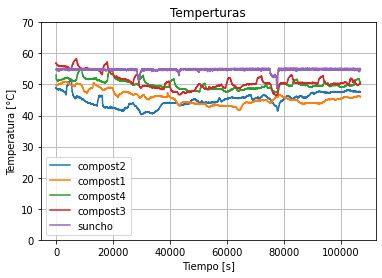

In [9]:
plt.figure("Temperaturas")
plt.title("Temperturas")
plt.plot(tiempos, temp_suncho, '-', markersize=1, label='compost2')
plt.plot(tiempos, temp_compost_1, '-', markersize=1, label='compost1')
plt.plot(tiempos, temp_compost_2, '-', markersize=1, label='compost4')
plt.plot(tiempos, temp_compost_3, '-', markersize=1, label='compost3')
plt.plot(tiempos, temp_compost_4, '-', markersize=1, label='suncho')
plt.legend()
plt.grid()
plt.ylim(0,70)
plt.xlabel("Tiempo [s]")
plt.ylabel("Temperatura [°C]")
plt.savefig(f"{PATH}/{DATE}/figuras/Temperatura.png")
plt.show()

No handles with labels found to put in legend.


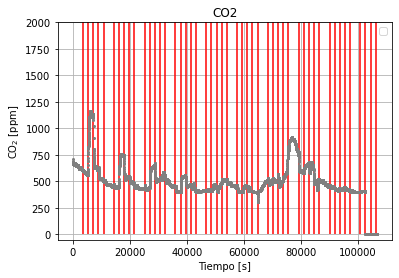

In [10]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", color="grey", markersize=4)
#plt.plot(tiempos, co2, "o", color="blue", label="TPS")
#plt.plot(tiempos, co2, "o", color="orange", label="Celulosa")
#plt.plot(tiempos, co2, "o", color="green", label=r"TPS/NP-$\mathrm{TiO_2}$")
#plt.plot(tiempos, co2, "o", color="red", label="Blanco")
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=5000, color="red")
plt.grid()
plt.legend()
plt.xlabel("Tiempo [s]")
plt.ylabel(r"$\mathrm{CO_2}$ [ppm]")

plt.ylim(-50,2000)
#plt.xlim(0,75000)

plt.savefig(f"{PATH}/{DATE}/figuras/CO2_completo.png")
plt.show()

# Integración

In [17]:
inicio = [] # Posición para empezar a medir el área
fin = []
for i in range(len(pos) - 1):
    if pos[i + 1] - pos[i] < 500:
        inicio.append(pos[i] + 60) # Dejamos 60 posiciones (5 minutos aprox) de espera
#        inicio.append(pos[i])
        fin.append(pos[i + 1])

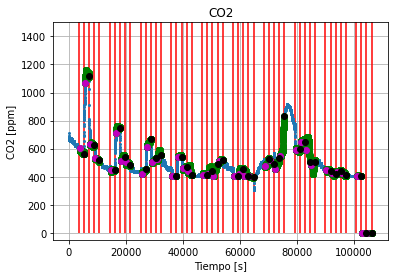

In [18]:
plt.figure("CO2")
plt.title("CO2")
plt.plot(tiempos, co2, ".", markersize=4)
for i in range(len(danza)):
    plt.vlines(x=danza[i], ymin=0, ymax=3000, color="r")
plt.grid()
plt.xlabel("Tiempo [s]")
plt.ylabel("CO2 [ppm]")

#plt.xlim(175000,200000)
plt.ylim(-50,1500)
#plt.xlim(100000,250000)

plt.scatter(tiempos[inicio], co2[inicio], color="m", zorder=4) #marco el inicio de cada área en color magenta
plt.scatter(tiempos[fin], co2[fin], color="k", zorder=5) #marco el fin de cada área en color negro
for i in range(len(inicio)):
    plt.scatter(tiempos[inicio[i]:fin[i]], co2[inicio[i]:fin[i]], color="g", zorder=3)

plt.savefig(f"{PATH}/{DATE}/figuras/areas_pintadas.png")
plt.show()

In [19]:
#CALCULO UN VALOR PROMEDIO, Y SU ERROR
promedio=[]
promedio_std=[]
for i in range(len(inicio)):
    promedio.append(np.mean(co2[inicio[i]:fin[i]].astype(float)))
    promedio_std.append(np.std(co2[inicio[i]:fin[i]].astype(float)))

In [20]:
promedio1 = []
promedio2 = []
promedio3 = []
promedio4 = []

promedio_std1 = []
promedio_std2 = []
promedio_std3 = []
promedio_std4 = []

for i in range(int(len(promedio) / 4)):
    promedio1.append(promedio[4 * i])
    promedio2.append(promedio[4 * i + 1])
    promedio3.append(promedio[4 * i + 2])
    promedio4.append(promedio[4 * i + 3])
    
    promedio_std1.append(promedio_std[4 * i])
    promedio_std2.append(promedio_std[4 * i + 1])
    promedio_std3.append(promedio_std[4 * i + 2])
    promedio_std4.append(promedio_std[4 * i + 3])

a=np.transpose(np.array([np.arange(1,(int(len(promedio1)))+1,1),promedio1,promedio2,promedio3,promedio4]))
np.savetxt(f'{PATH}/{DATE}/figuras/promedio.csv', a, delimiter=', ', newline='\n', header='nro,promedio1,promedio2,promedio3,promedio4')

b=np.transpose(np.array([np.arange(1,(int(len(promedio_std1)))+1,1),promedio_std1,promedio_std2,promedio_std3,promedio_std4]))
np.savetxt(f'{PATH}/{DATE}/figuras/promedio_std.csv', b, delimiter=', ', newline='\n', header='nro,promedio_std1,promedio_std2,promedio_std3,promedio_std4')


In [21]:
promedio

[576.0323886639676,
 1126.7206477732793,
 626.4615384615385,
 522.6720647773279,
 447.7732793522267,
 746.085020242915,
 538.080971659919,
 491.2874493927126,
 433.2429149797571,
 641.4736842105264,
 512.8947368421053,
 559.2429149797571,
 405.12145748987854,
 546.5668016194332,
 462.6356275303644,
 442.12145748987854,
 417.246963562753,
 458.1012145748988,
 456.09716599190284,
 515.3279352226721,
 405.7975708502024,
 455.42914979757086,
 413.55465587044534,
 400.7449392712551,
 491.73279352226723,
 502.43724696356276,
 486.3481781376518,
 622.3562753036438,
 592.6963562753036,
 655.1821862348178,
 629.4534412955466,
 486.97165991902835,
 444.4817813765182,
 422.2712550607287,
 433.53846153846155,
 421.1012145748988,
 406.6923076923077,
 0.0,
 0.0]

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [16]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): # Meter el área
    return F * x * 44 / (den * 60)

In [ ]:
gramos(np.array(promedio))

In [ ]:
from datetime import datetime  
from datetime import timedelta  
  
#Add 1 day  
print(datetime.now() + timedelta(days=1))
  
#Subtract 60 seconds  
print (datetime.now() - timedelta(seconds=60)) 
  
#Add 2 years  
print (datetime.now() + timedelta(days=730) ) 
  
#Other Parameters you can pass in to timedelta:  
# days, seconds, microseconds,   
# milliseconds, minutes, hours, weeks  
  
#Pass multiple parameters (1 day and 5 minutes)  
print (datetime.now() + timedelta(days=1,minutes=5)  )

In [ ]:
DATE

In [ ]:
from datetime import date
date.fromisoformat(f'{DATE[0:10]}')

In [ ]:
datetime.time(f'{DATE[11:]}')

In [ ]:
DATE[11:].replace('"','\\' )

In [ ]:
replace(DATE[0:10],'"','\\"')